In [1]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pylab as plt

drive.mount('/content/drive')

Mounted at /content/drive


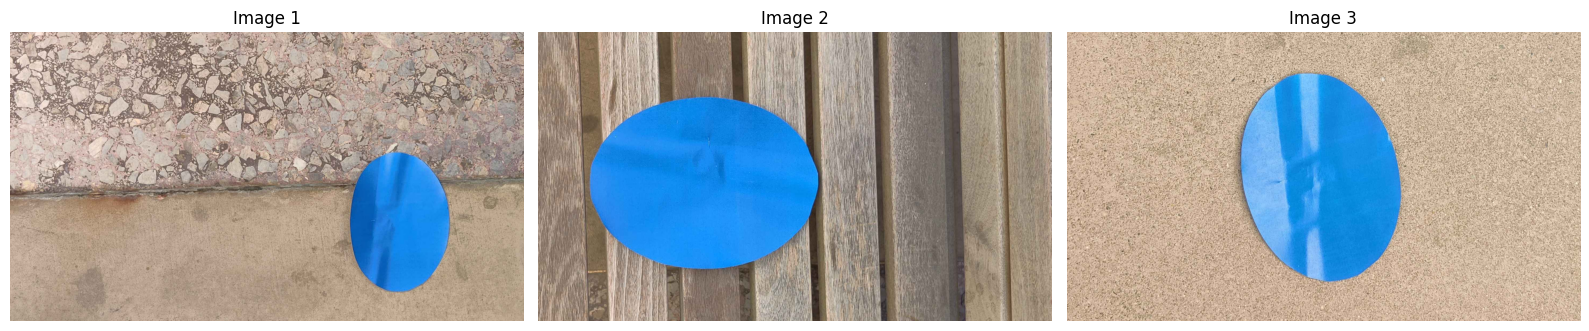

In [2]:
# Replace this prefix with whatever directory has all of your pictures
prefix = '/content/drive/MyDrive/Onboarding 2025'

img1 = cv2.imread(prefix + '/i1 (1).jpg')
img2 = cv2.imread(prefix + '/i2 (1).jpg')
img3 = cv2.imread(prefix + '/i3 (1).jpg')


'''
Resize and convert BGR to RGB for each image
The original images are too high quality and take too long to load, so we downscale them
'''

# Now you can create the list of images
img_list = [img1, img2, img3]

# This plot is to make it easy for you to see all the images you are working with
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes = axes.ravel()

# Loop through the images and plot them, converting from BGR to RGB for plotting only
for i in range(3):
    axes[i].imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB here for plotting
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [40]:
from typing_extensions import final
'''
def get_coords(img):
  # Image 1

  img1 = cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB)
  img2 = cv2.cvtColor(img[1], cv2.COLOR_BGR2RGB)
  img3 = cv2.cvtColor(img[2], cv2.COLOR_BGR2RGB)

  bilateral_filtered1 = cv2.bilateralFilter(img1, d=9, sigmaColor=75, sigmaSpace=75)

  bilateral_filtered2 = cv2.bilateralFilter(img2, d=9, sigmaColor=75, sigmaSpace=75)

  bilateral_filtered3 = cv2.bilateralFilter(img3, d=9, sigmaColor=75, sigmaSpace=75)


  edges1 = cv2.Canny(bilateral_filtered1, 150, 200)
  edges2 = cv2.Canny(bilateral_filtered2, 150, 200)
  edges3 = cv2.Canny(bilateral_filtered3, 150, 200)

  new_hsv1 = cv2.cvtColor(bilateral_filtered1, cv2.COLOR_RGB2HSV)

  new_hsv2 = cv2.cvtColor(bilateral_filtered2, cv2.COLOR_RGB2HSV)
  new_hsv3 = cv2.cvtColor(bilateral_filtered3, cv2.COLOR_RGB2HSV)

  s_channel1 = new_hsv1[:, :, 1]
  edges_s1 = cv2.Canny(s_channel1, 50, 200)
  v_channel1 = new_hsv1[:, :, 2]
  edges_v1 = cv2.Canny(v_channel1, 50, 200)

  s_channel2 = new_hsv2[:, :, 1]
  edges_s2 = cv2.Canny(s_channel2, 50, 200)
  v_channel2 = new_hsv2[:, :, 2]
  edges_v2 = cv2.Canny(v_channel2, 50, 200)

  s_channel3 = new_hsv3[:, :, 1]
  edges_s3 = cv2.Canny(s_channel3, 50, 200)
  v_channel3 = new_hsv3[:, :, 2]
  edges_v3 = cv2.Canny(v_channel3, 50, 200)

  sobel_x1 = cv2.Sobel(v_channel1, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y1 = cv2.Sobel(v_channel1, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude1 = np.sqrt(sobel_x1**2 + sobel_y1**2)
  edge_threshold1 = 50  # Adjust this threshold as needed
  sobel1 = np.uint8(gradient_magnitude1 > edge_threshold1)

  sobel_x2 = cv2.Sobel(v_channel2, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y2 = cv2.Sobel(v_channel2, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude2 = np.sqrt(sobel_x2**2 + sobel_y2**2)
  edge_threshold2 = 50  # Adjust this threshold as needed
  sobel2 = np.uint8(gradient_magnitude2 > edge_threshold2)


  sobel_x3 = cv2.Sobel(v_channel3, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y3 = cv2.Sobel(v_channel3, cv2.CV_64F, 0, 1, ksize=3)
  gradient_magnitude3 = np.sqrt(sobel_x3**2 + sobel_y3**2)
  edge_threshold3 = 50  # Adjust this threshold as needed
  sobel3 = np.uint8(gradient_magnitude3 > edge_threshold3)

  plt.figure(figsize=(15, 10))

  plt.subplot(1, 3, 1)
  plt.imshow(sobel1)

  plt.subplot(1, 3, 2)
  plt.imshow(sobel2)

  plt.subplot(1, 3, 3)
  plt.imshow(sobel3)

  x_dist = 0
  y_dist = 0 # Replace with your own solution
  return x_dist, y_dist
# Image 1
'''
final_images = []
mask_sums_all = []
blurred_arr = []
sobel_arr = []

for idx, img in enumerate(img_list):
    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Median blur (ALL use ksize=15)
    filtered = cv2.medianBlur(img_rgb, ksize=25)

    blurred_arr.append(filtered)

    # Convert to HSV
    hsv = cv2.cvtColor(filtered, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:, :, 2]

    # Sobel edge detection
    sobel_x = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(v_channel, cv2.CV_64F, 0, 1, ksize=3)
    gradient_mag = np.sqrt(sobel_x**2 + sobel_y**2)
    if idx == 0:
      edge_threshold = 30  # Adjust this threshold as needed
    if idx == 1:
      edge_threshold = 25  # Adjust this threshold as needed
    if idx == 2:
      edge_threshold = 20  # Adjust this threshold as needed
    sobel_edges = np.zeros_like(v_channel, dtype=np.uint8)
    sobel_edges[gradient_mag > edge_threshold] = 255
    sobel_arr.append(sobel_edges)

    sobel_arr.append(sobel_edges)

    canny_edges = cv2.Canny(v_channel, 100, 200)
    edges = cv2.bitwise_or(sobel_edges, canny_edges)

    kernel = np.ones((7, 7), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find largest contour
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)

    contour_mask = np.zeros_like(edges)
    cv2.drawContours(contour_mask, [largest_contour], -1, 255, cv2.FILLED)

    # Erode mask
    kernel = np.ones((9, 9), np.uint8)
    eroded_mask = cv2.erode(contour_mask, kernel, iterations=1)

    # Apply mask
    final_image = cv2.bitwise_and(img_rgb, img_rgb, mask=eroded_mask)
    final_images.append(final_image)


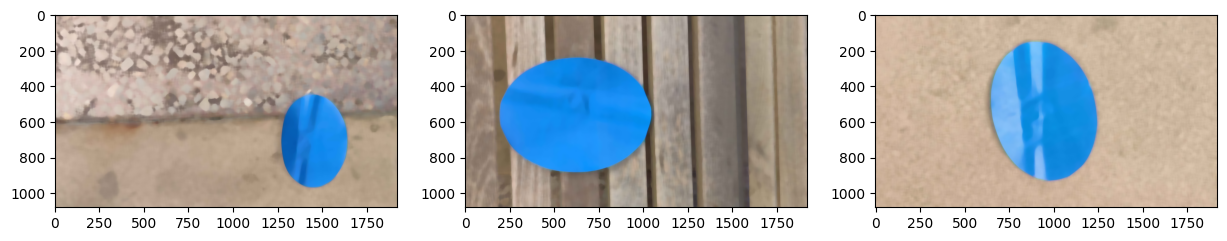

In [31]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(blurred_arr[i])

plt.show()

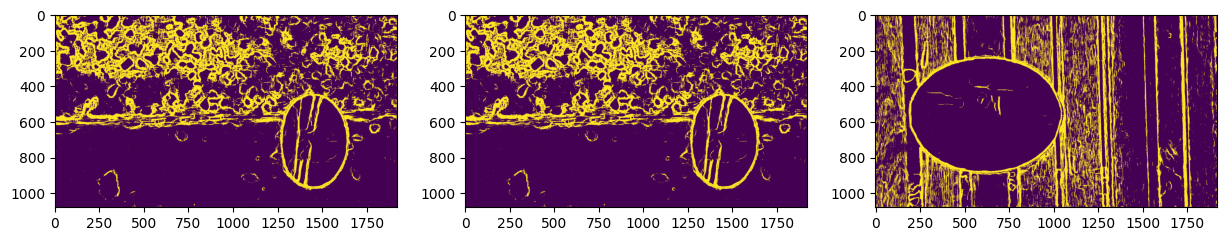

In [35]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sobel_arr[i])

plt.show()

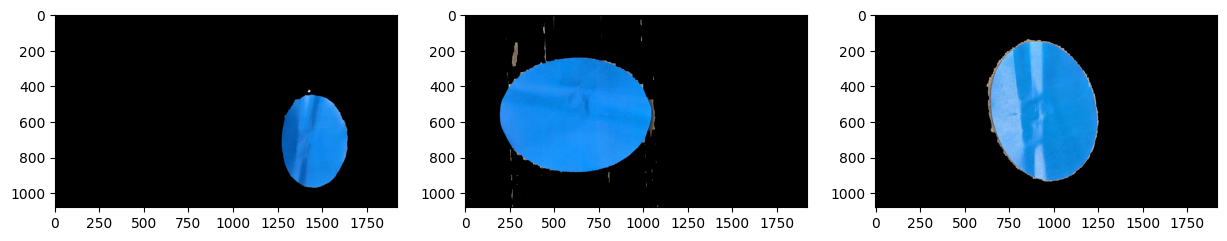

In [41]:
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(final_images[i])

plt.show()

In [ ]:
# Run this code block when you think you have a solution and want to check it but do not modify this block
correct_coords = [
    (493.0, 169.0),
    (-340.0, 24.0),
    (-13.0, 1.0)
]

def assert_coords_within_range(your_coords, correct_coords):
    tolerance = 50
    for i, (your_x, your_y) in enumerate(your_coords):
        correct_x, correct_y = correct_coords[i]

        assert abs(your_x - correct_x) <= tolerance, f"X coordinate for image {i+1} out of range: got {your_coords}, expected {correct_x}"
        assert abs(your_y - correct_y) <= tolerance, f"Y coordinate for image {i+1} out of range: got {your_coords}, expected {correct_y}"

        print(f"Image {i+1}: Coordinates are within the acceptable range.")

your_coords = [get_coords(img) for img in img_list]

assert_coords_within_range(your_coords, correct_coords)